In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [162]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [163]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75


In [164]:
data.dropna(inplace=True)
test.dropna(inplace=True)

In [165]:
data = data.drop(["Unnamed: 0"],axis=1)
test = test.drop(["Unnamed: 0"],axis=1)

In [166]:
data["brand"] = data["Name"].apply(lambda x: x.split()[0])
test["brand"] = test["Name"].apply(lambda x: x.split()[0])

In [167]:
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float)
data['Power'] = data['Power'].str.extract('(\d+)').astype(float)
data['Mileage'] = data['Mileage'].str.extract('(\d+)').astype(float)
data['Owner_Type'] = data['Owner_Type'].replace({'First': 1, 'Second': 2,'Third':3,'Fourth & Above':4})
print(data[['Engine', 'Power','Mileage','Owner_Type']].head())

   Engine  Power  Mileage  Owner_Type
0  1199.0   84.0     23.0           1
1  1493.0  100.0     18.0           1
2  1598.0  103.0     15.0           1
3  1396.0   53.0     17.0           2
4  1248.0   88.0     21.0           2


/tmp/ipykernel_3835/3421210590.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Owner_Type'] = data['Owner_Type'].replace({'First': 1, 'Second': 2,'Third':3,'Fourth & Above':4})


In [168]:
test['Engine'] = test['Engine'].str.extract('(\d+)').astype(float)
test['Power'] = test['Power'].str.extract('(\d+)').astype(float)
test['Mileage'] = test['Mileage'].str.extract('(\d+)').astype(float)
test['Owner_Type'] = test['Owner_Type'].replace({'First': 1, 'Second': 2,'Third':3,'Fourth & Above':4})
print(test[['Engine', 'Power','Mileage','Owner_Type']].head())

   Engine  Power  Mileage  Owner_Type
0  1248.0   74.0     23.0           1
1  1197.0   78.0     16.0           1
2  1197.0   81.0     18.0           1
3  2400.0  215.0     13.0           1
4  1197.0   78.0     20.0           1


/tmp/ipykernel_3835/272250422.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Owner_Type'] = test['Owner_Type'].replace({'First': 1, 'Second': 2,'Third':3,'Fourth & Above':4})


In [169]:
data["brand_encoded"] = data["brand"].astype("category").cat.codes
data["Transmission_encoded"] = data["Transmission"].astype("category").cat.codes
data["Fuel_encoded"] = data["Fuel_Type"].astype("category").cat.codes
data["loc_encoded"] = data["Location"].astype("category").cat.codes
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand,brand_encoded,Transmission_encoded,Fuel_encoded,loc_encoded
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,1,23.0,1199.0,84.0,5.0,5.00,Tata,24,1,1,5
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,1,18.0,1493.0,100.0,7.0,8.37,Mahindra,14,0,0,7
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,1,15.0,1598.0,103.0,5.0,4.50,Skoda,22,1,1,9
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,2,17.0,1396.0,53.0,5.0,0.85,Tata,24,1,0,6
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,2,21.0,1248.0,88.0,5.0,2.65,Tata,24,1,0,9


In [170]:
test["brand_encoded"] = test["brand"].astype("category").cat.codes
test["Transmission_encoded"] = test["Transmission"].astype("category").cat.codes
test["Fuel_encoded"] = test["Fuel_Type"].astype("category").cat.codes
test["loc_encoded"] = test["Location"].astype("category").cat.codes
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand,brand_encoded,Transmission_encoded,Fuel_encoded,loc_encoded
0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,1,23.0,1248.0,74.0,5.0,6.95,Maruti,13,1,0,5
1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,1,16.0,1197.0,78.0,5.0,2.90,Hyundai,7,0,1,4
2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,1,18.0,1197.0,81.0,5.0,6.28,Hyundai,7,1,1,7
3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,1,13.0,2400.0,215.0,5.0,13.80,Volvo,24,0,0,10
4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,1,20.0,1197.0,78.0,5.0,2.75,Hyundai,7,1,1,4


In [171]:
X=data.drop(columns=['Price','Name','brand','Location','Fuel_Type','Transmission'])
Y=data['Price'].values
X = (X - X.mean(axis=0)) / X.std(axis=0)
X.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,brand_encoded,Transmission_encoded,Fuel_encoded,loc_encoded
0,1.128049,-1.028504,-0.437657,1.199647,-0.704021,-0.539929,-0.344671,1.521007,0.635289,1.072722,-0.194174
1,1.128049,-0.264174,-0.437657,0.074467,-0.214919,-0.245157,2.135759,0.102149,-1.573663,-0.931957,0.485435
2,0.202247,-0.570258,-0.437657,-0.600641,-0.040240,-0.189887,-0.344671,1.237236,0.635289,1.072722,1.165045
3,-1.957958,3.516800,1.781676,-0.150569,-0.376289,-1.111051,-0.344671,1.521007,0.635289,-0.931957,0.145631
4,-0.106354,0.148073,1.781676,0.749575,-0.622504,-0.466236,-0.344671,1.521007,0.635289,-0.931957,1.165045


In [172]:
X_t=test.drop(columns=['Price','Name','brand','Location','Fuel_Type','Transmission'])
Y_t=test['Price'].values
X_t = (X_t - X_t.mean(axis=0)) / X_t.std(axis=0)
X_t.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,brand_encoded,Transmission_encoded,Fuel_encoded,loc_encoded
0,-0.144330,0.117910,-0.437096,1.212450,-0.675429,-0.794399,-0.362368,0.268651,0.661171,-0.881021,-0.220759
1,-0.456083,0.000129,-0.437096,-0.379612,-0.762614,-0.715313,-0.362368,-0.613671,-1.511249,1.134132,-0.556767
2,1.102683,-0.133409,-0.437096,0.075263,-0.762614,-0.655998,-0.362368,-0.613671,0.661171,1.134132,0.451257
3,-0.767837,0.240575,-0.437096,-1.061924,1.293920,1.993388,-0.362368,1.886243,-1.511249,-0.881021,1.459282
4,-0.144330,-0.012147,-0.437096,0.530138,-0.762614,-0.715313,-0.362368,-0.613671,0.661171,1.134132,-0.556767


In [173]:
if np.isnan(X.values).any() or np.isnan(Y.values).any():
    X = np.nan_to_num(X, nan=np.nanmean(X))
    Y = np.nan_to_num(Y, nan=np.nanmean(Y))

In [174]:
if np.isnan(X_t.values).any() or np.isnan(Y_t.values).any():
    X_t = np.nan_to_num(X_t, nan=np.nanmean(X_t))
    Y_t = np.nan_to_num(Y_t, nan=np.nanmean(Y_t))

In [175]:
Y = Y.reshape(X.shape[0], 1) 
Y_t = Y_t.reshape(X_t.shape[0], 1) 

In [176]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_t = np.vstack((np.ones((X_t.shape[0], )), X_t.T)).T

In [177]:
def model(X, Y, Y_t, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10) == 0):
            print("Epoch", int(i/(iteration/10))+1)
            print("Cost:", cost)
            y_pred = np.dot(X_t, theta)
            Y_t = np.array(Y_t)
            y_pred = np.array(y_pred)
            ss_total = np.sum((Y_t - np.mean(Y_t)) ** 2) 
            ss_residual = np.sum((Y_t - y_pred) ** 2)  
            ##ss = sum of squares
            r2 = 1 - (ss_residual / ss_total)
            test_accuracy = 100*r2
            print(f"Accuracy: {test_accuracy:.2f}%")
    return theta, cost_list

In [178]:
iteration = 1000
learning_rate = 0.01
theta, cost_list = model(X, Y, Y_t, learning_rate = learning_rate, iteration =
iteration)

Epoch 1
Cost: 108.31267612321764
Accuracy: -72.26%
Epoch 2
Cost: 26.977340853337008
Accuracy: 52.99%
Epoch 3
Cost: 20.760391682760716
Accuracy: 63.83%
Epoch 4
Cost: 19.811177911834182
Accuracy: 65.96%
Epoch 5
Cost: 19.598071720242704
Accuracy: 66.64%
Epoch 6
Cost: 19.51866024157722
Accuracy: 66.97%
Epoch 7
Cost: 19.47532556309199
Accuracy: 67.17%
Epoch 8
Cost: 19.446573691846016
Accuracy: 67.30%
Epoch 9
Cost: 19.425396478850292
Accuracy: 67.40%
Epoch 10
Cost: 19.408762727938957
Accuracy: 67.46%


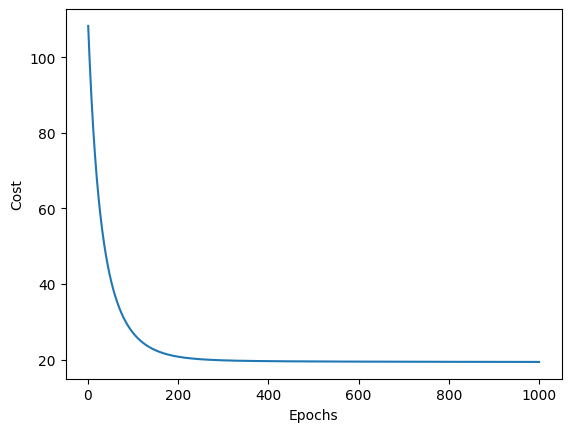

In [179]:
xaxis = list(range(1, len(cost_list)+1))
plt.plot(xaxis,cost_list)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [180]:
y_pred = np.dot(X_t, theta)
Y_t = np.array(Y_t)
y_pred = np.array(y_pred)
ss_total = np.sum((Y_t - np.mean(Y_t)) ** 2)  
ss_residual = np.sum((Y_t - y_pred) ** 2)   
r2 = 1 - (ss_residual / ss_total)
print(f"R-squared (R^2) Score: {r2:.2f}")

test_accuracy = 100*r2
print(f"Model Test Accuracy (approx): {test_accuracy:.2f}%")


R-squared (R^2) Score: 0.68
Model Test Accuracy (approx): 67.51%


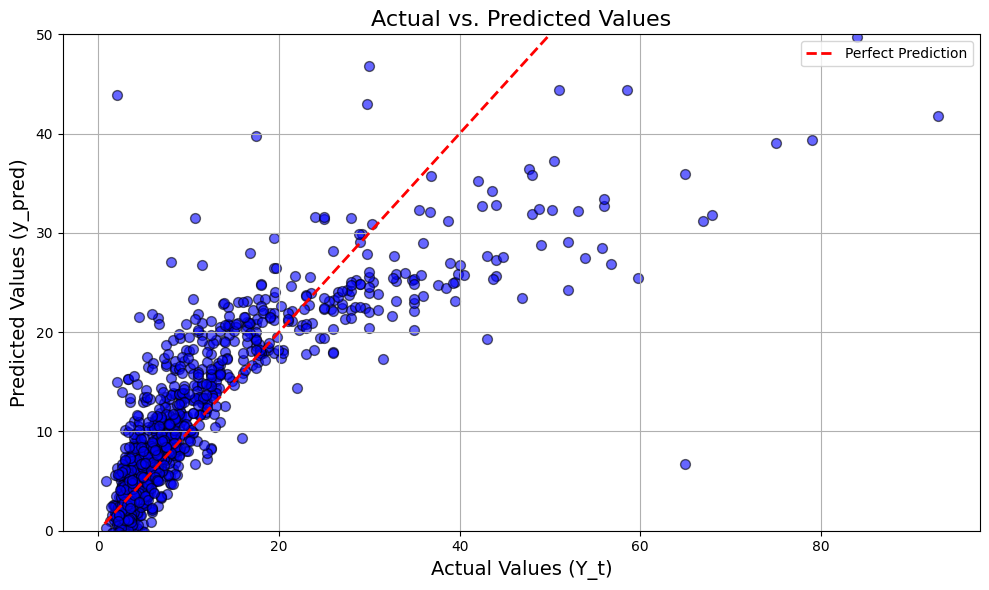

In [181]:
plt.figure(figsize=(10, 6)) 
plt.scatter(Y_t, y_pred, color='blue', alpha=0.6, edgecolors='k', s=50) 

plt.xlabel("Actual Values (Y_t)", fontsize=14)
plt.ylabel("Predicted Values (y_pred)", fontsize=14)
plt.title("Actual vs. Predicted Values", fontsize=16)

plt.plot([Y_t.min(), Y_t.max()], [Y_t.min(), Y_t.max()], 'r--', linewidth=2, label='Perfect Prediction')  

plt.ylim(0, 50)

plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()